In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.integrate import odeint
%matplotlib notebook

In [2]:
a = 0.001
d = 1e-5

In [3]:
def kon(c, wm, wd):
    mu_c = np.log(c) - 0.5 * np.log(2 * np.exp(wd) * c + np.sqrt(4 * np.exp(wd) * c + 1) + 1)
    s_on = np.exp(mu_c)
    kon = s_on / c
    return kon

def koff(m, wm, wd):
    mu_m = np.log(m) - wm - 0.5 * np.log(2 * np.exp(wd) * m + np.sqrt(4 * np.exp(wd) * m + 1) + 1)
    s_off = np.exp(mu_m)
    koff = s_off / m
    return koff

In [4]:
def dxdt(X, wd, wm, we, a=a):
    c = X[0] 
    m = X[1]
    e = X[2]
     
    r = np.zeros(4)
    r[0] = kon(c, wm, wd) * c  # onto membrane
    r[1] = koff(m, wm, wd) * m  # off membrane
    r[2] = kon(c, we, wd) * c  # onto endosomes
    r[3] = koff(e, we, wd) * e  # off endosomes
    
    dc = a * (- r[0] + r[1] - r[2] + r[3])
    dm = + r[0] - r[1]
    de = + r[2] - r[3]
    
    return dc, dm, de

<IPython.core.display.Javascript object>


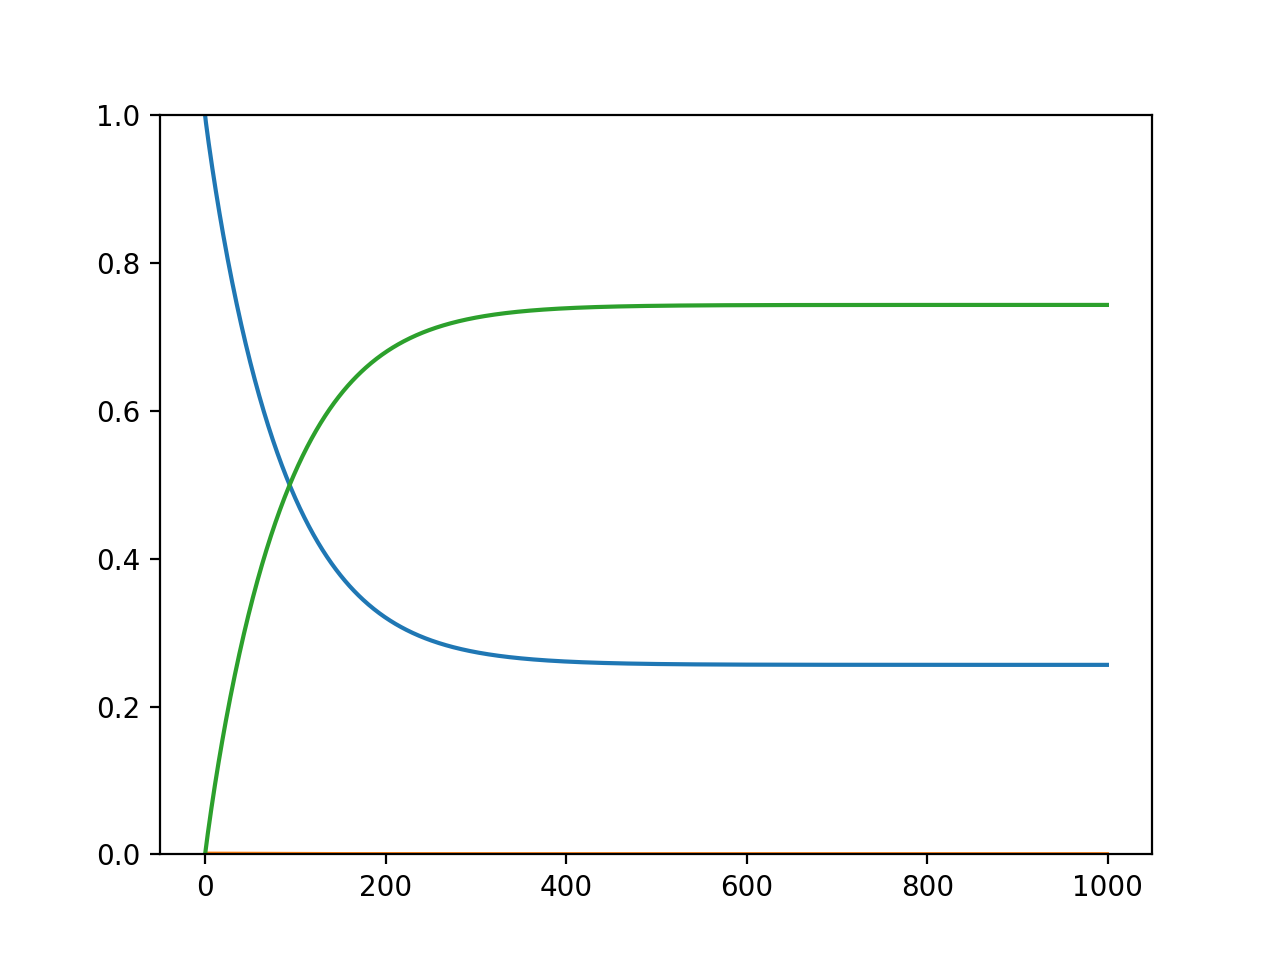

(0.0, 1.0)

In [5]:
fig, ax = plt.subplots()

def func(X, t=0):
    return dxdt(X, wd=20, wm=0, we=4)

sol = odeint(func, [d, 1e-100, 1e-100],  t=np.linspace(0, 1000000, 1000))
ax.plot(sol[:, 0] / d)
ax.plot(sol[:, 1] * a / d)
ax.plot(sol[:, 2] * a / d)
ax.set_ylim(0, 1)

<IPython.core.display.Javascript object>


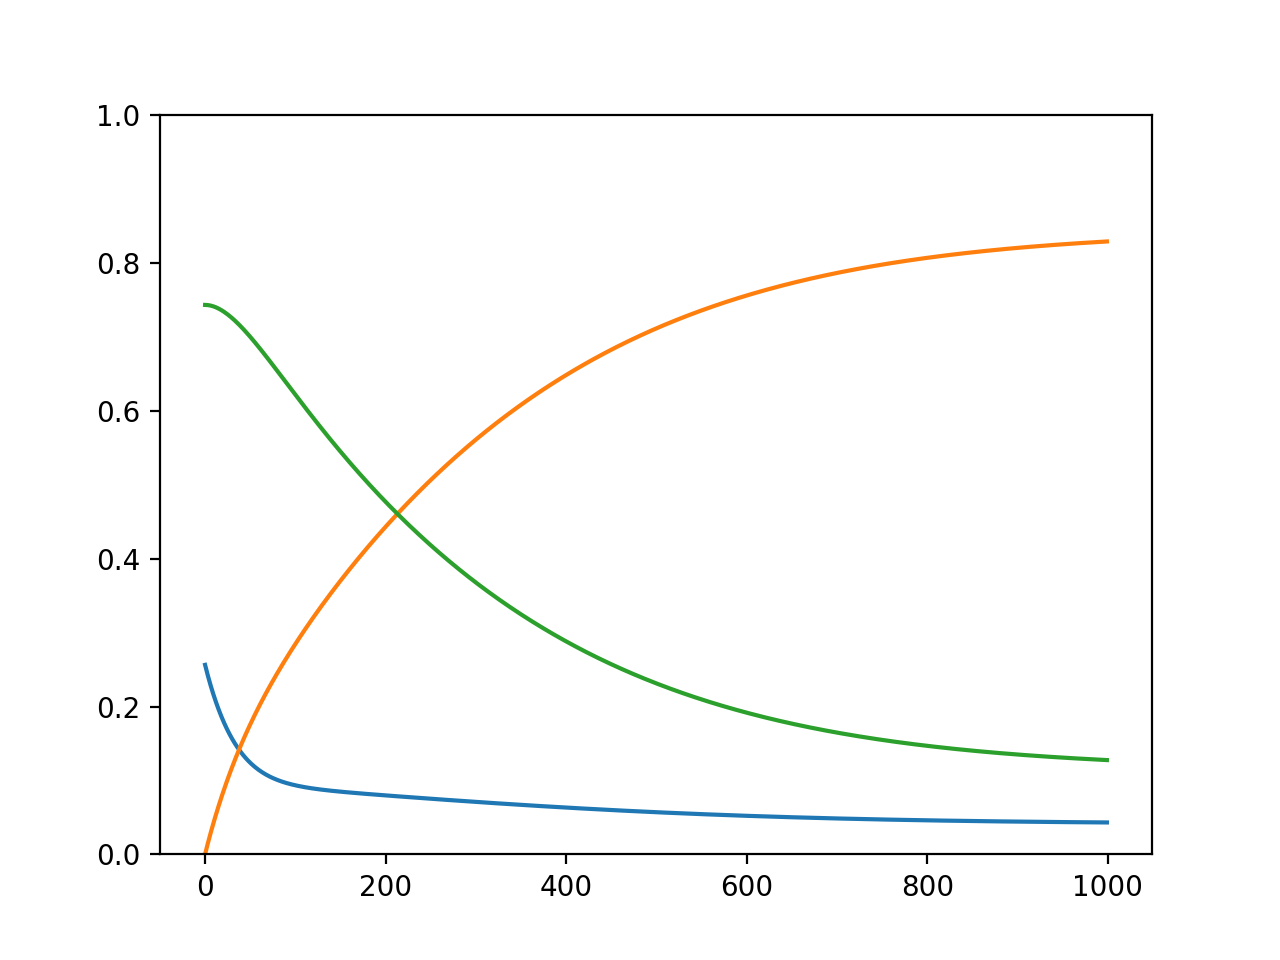

(0.0, 1.0)

In [6]:
fig, ax = plt.subplots()

def func(X, t=0):
    return dxdt(X, wd=20, wm=5, we=4)

sol2 = odeint(func, sol[-1],  t=np.linspace(0, 1000000, 1000))
ax.plot(sol2[:, 0] / d)
ax.plot(sol2[:, 1] * a / d)
ax.plot(sol2[:, 2] * a / d)
ax.set_ylim(0, 1)

<IPython.core.display.Javascript object>


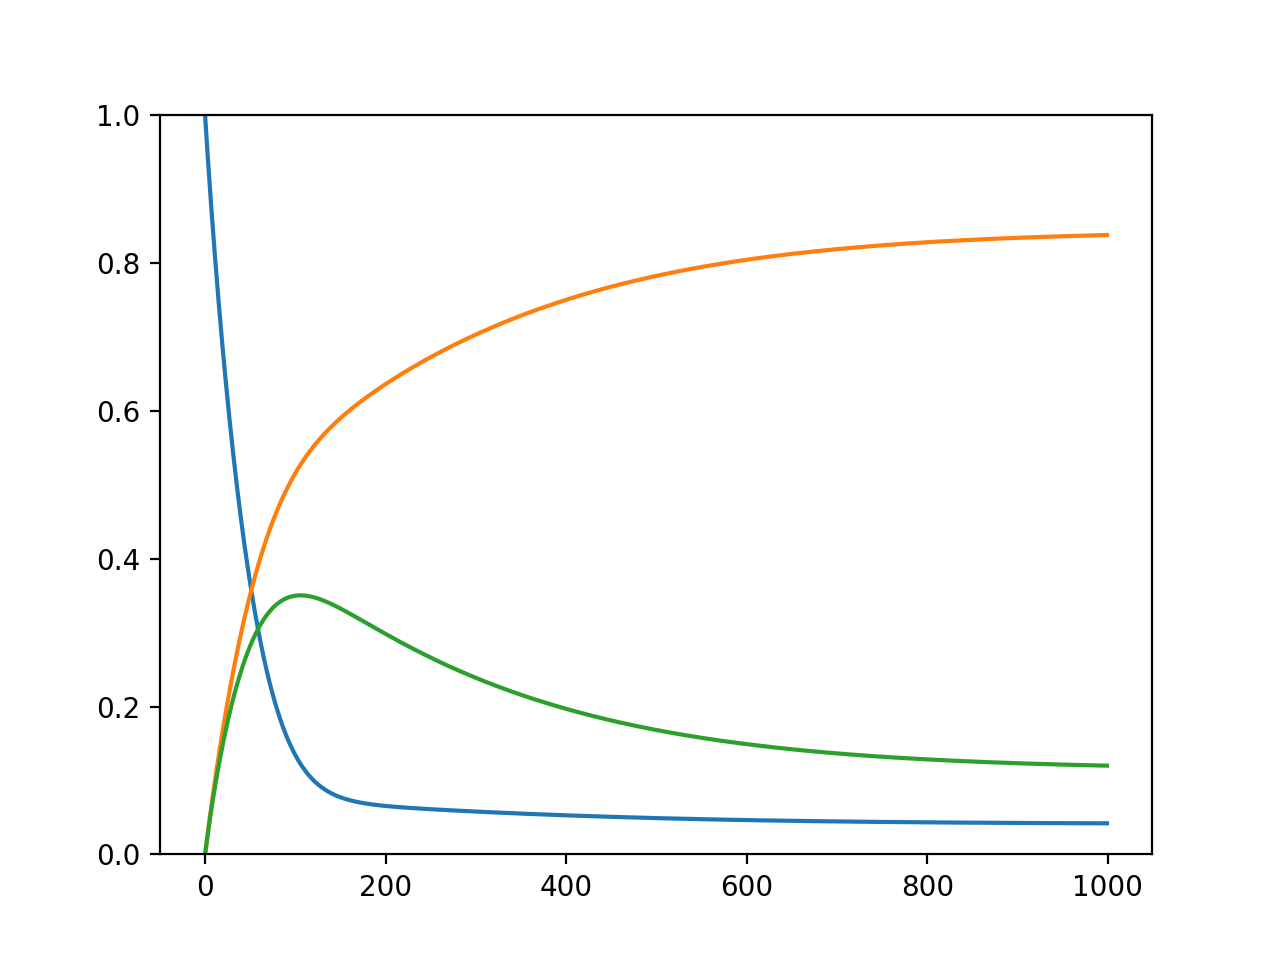

(0.0, 1.0)

In [7]:
fig, ax = plt.subplots()

def func(X, t=0):
    return dxdt(X, wd=20, wm=5, we=4)

sol = odeint(func, [d, 1e-100, 1e-100],  t=np.linspace(0, 1000000, 1000))
ax.plot(sol[:, 0] / d)
ax.plot(sol[:, 1] * a / d)
ax.plot(sol[:, 2] * a / d)
ax.set_ylim(0, 1)

### Figure

In [8]:
def panel1(ax, wd, wm, x0):
    def func(X, t=0):
        return dxdt(X, wd=wd, wm=wm, we=3.5)

    sol = odeint(func, x0,  t=np.linspace(0, 1000000, 1000))
    ax.bar(1, sol[-1, 0] / d)
    ax.bar(2, sol[-1, 1] * a / d)
    ax.bar(3, sol[-1, 2] * a / d)
    ax.set_ylim(0, 1) 
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xticks([1, 2, 3])
    return sol[-1]


def panel2(ax, wd, wm, x0):
    def func(X, t=0):
        return dxdt(X, wd=wd, wm=wm, we=3.5)

    sol = odeint(func, x0,  t=np.linspace(0, 10000, 1000))
    ax.plot(sol[:, 0] / d)
    ax.plot(sol[:, 1] * a / d)
    ax.plot(sol[:, 2] * a / d)
    ax.set_ylim(0, 1) 
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xticks(np.arange(0, 1200, 200))
    return sol[-1]
    
# fig, ax = plt.subplots(3, 3)
# sol = panel1(ax[0][0], wd=10, wm=0, x0=[d, 1e-100, 1e-100])
# panel2(ax[0][1], wd=10, wm=5, x0=sol)
# panel1(ax[0][2], wd=10, wm=5, x0=[d, 1e-100, 1e-100])

# sol = panel1(ax[1][0], wd=12, wm=0, x0=[d, 1e-100, 1e-100])
# panel2(ax[1][1], wd=12, wm=5, x0=sol)
# panel1(ax[1][2], wd=12, wm=5, x0=[d, 1e-100, 1e-100])

# sol = panel1(ax[2][0], wd=15, wm=0, x0=[d, 1e-100, 1e-100])
# panel2(ax[2][1], wd=15, wm=5, x0=sol)
# panel1(ax[2][2], wd=15, wm=5, x0=[d, 1e-100, 1e-100])

#### Column 1

<IPython.core.display.Javascript object>


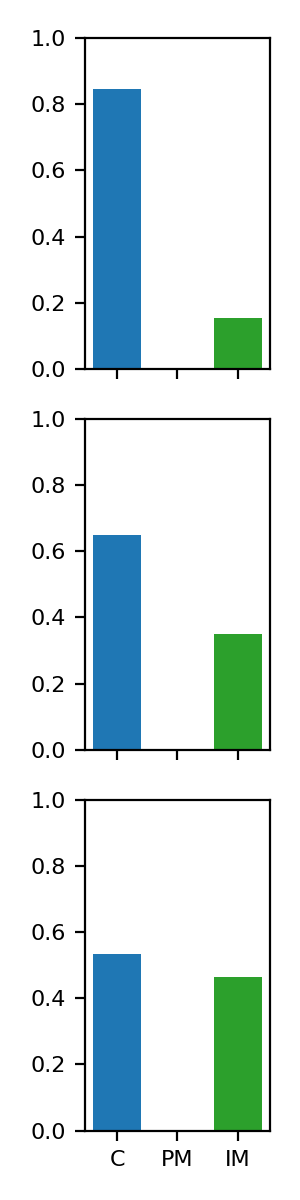

In [9]:
fig, ax = plt.subplots(3, 1)
sol1 = panel1(ax[0], wd=10, wm=0, x0=[d, 1e-100, 1e-100])
sol2 = panel1(ax[1], wd=12.5, wm=0, x0=[d, 1e-100, 1e-100])
sol3 = panel1(ax[2], wd=15, wm=0, x0=[d, 1e-100, 1e-100])
ax[0].set_xticklabels(['', '', ''])
ax[1].set_xticklabels(['', '', ''])
ax[2].set_xticklabels(['C', 'PM', 'IM'])

fig.set_size_inches(1.5, 6)
fig.tight_layout()
fig.savefig('Figs_three_surface/3surface_kinetic_column1.png', dpi=600, transparent=True)

#### Column 2

<IPython.core.display.Javascript object>


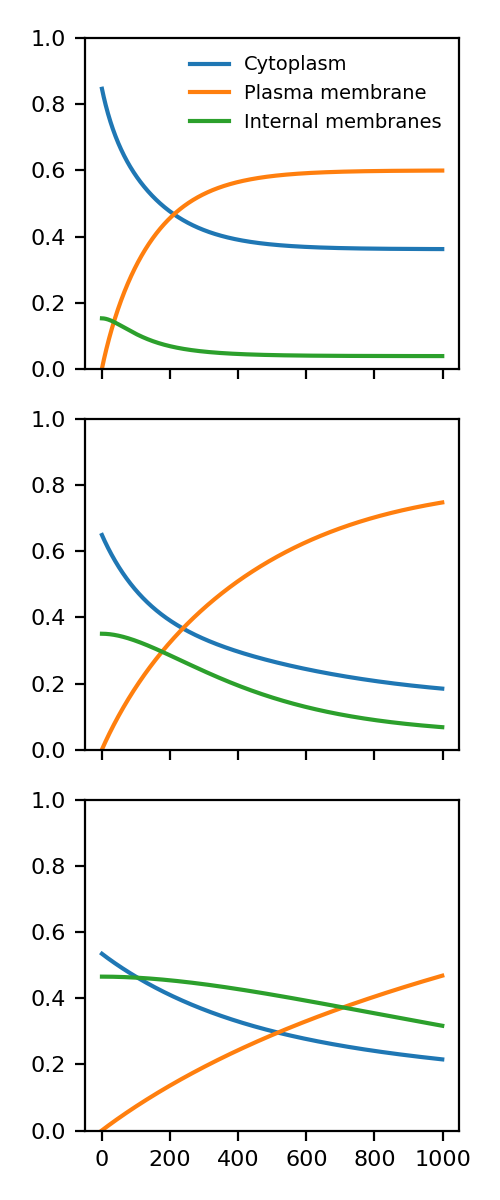

In [10]:
fig, ax = plt.subplots(3, 1)
panel2(ax[0], wd=10, wm=5, x0=sol1)
panel2(ax[1], wd=12.5, wm=5, x0=sol2)
panel2(ax[2], wd=15, wm=5, x0=sol3)
ax[0].set_xticklabels([''] * 6)
ax[1].set_xticklabels([''] * 6)
ax[2].set_xticklabels(np.arange(0, 1200, 200))

ax[0].plot([],[], label='Cytoplasm', c='tab:blue')
ax[0].plot([],[], label='Plasma membrane', c='tab:orange')
ax[0].plot([],[], label='Internal membranes', c='tab:green')
ax[0].legend(frameon=False, fontsize=7)

fig.set_size_inches(2.5, 6)
fig.tight_layout()
fig.savefig('Figs_three_surface/3surface_kinetic_column2.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


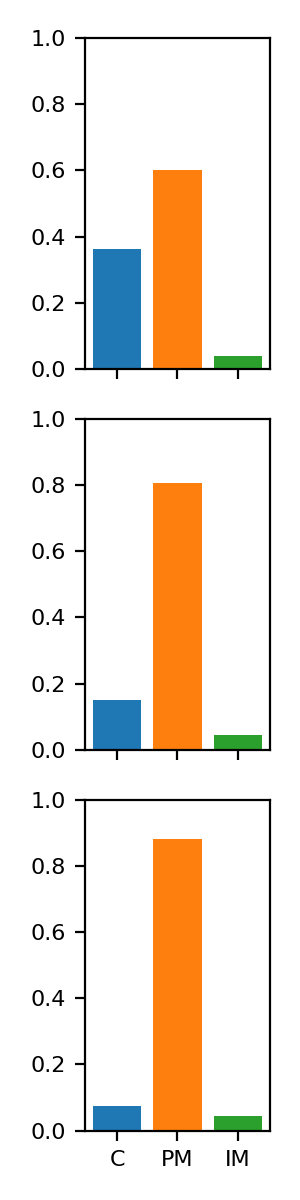

In [11]:
fig, ax = plt.subplots(3, 1)
panel1(ax[0], wd=10, wm=5, x0=[d, 1e-100, 1e-100])
panel1(ax[1], wd=12.5, wm=5, x0=[d, 1e-100, 1e-100])
panel1(ax[2], wd=15, wm=5, x0=[d, 1e-100, 1e-100])
ax[0].set_xticklabels(['', '', ''])
ax[1].set_xticklabels(['', '', ''])
ax[2].set_xticklabels(['C', 'PM', 'IM'])

fig.set_size_inches(1.5, 6)
fig.tight_layout()
fig.savefig('Figs_three_surface/3surface_kinetic_column3.png', dpi=600, transparent=True)